# Sorting accuracy for det. threshold t

The detection threshold is -6 sd by defailt.

## Setup

activate `npx_10m_384ch_unit_classes`

In [1]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/bernstein_2023"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies


# BUCCINO 2020
EXPERIMENT = "buccino_2020"
SIMULATION_DATE = "2020"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
BUCCI_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
BUCCI_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]
# BUCCI_TRUE_UNIT_ACCURACIES_FILE_PATH = data_conf["postprocessing"]["unit_accuracies"]


# HYBRID JANELIA
EXPERIMENT = "supp/hybrid_janelia"
SIMULATION_DATE = "2023_06_10"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
JANEL_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
JANEL_GT_SORTING_PATH = data_conf["sorting"]["ground_truth"]["output"]
# JANEL_TRUE_UNIT_ACCURACIES_FILE_PATH = data_conf["postprocessing"]["unit_accuracies"]


# npx-32
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_02_19"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
OUR_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
OUR_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]
# OUR_TRUE_UNIT_ACCURACIES_FILE_PATH = data_conf["postprocessing"]["unit_accuracies"]


# npx-384
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_08_17"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
# npx384_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]

# I run thresh at np.inf as a test and the sorter failed, which means that it uses the parameter (not hard coded)
npx384_KS3_SORTING_PATH_THRESH_00 = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/sorting/0_silico/test_neuropixels_lfp_10m_384ch_hex_O1_40Khz_2023_08_17/421db120-c09a-4b21-9b5d-f63e2c0d15b4/sorting_vs_thresh/SortingKS3_thresh_00/'
npx384_KS3_SORTING_PATH_THRESH_01 = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/sorting/0_silico/test_neuropixels_lfp_10m_384ch_hex_O1_40Khz_2023_08_17/421db120-c09a-4b21-9b5d-f63e2c0d15b4/sorting_vs_thresh/SortingKS3_thresh_01/'
npx384_KS3_SORTING_PATH_THRESH_02 = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/sorting/0_silico/test_neuropixels_lfp_10m_384ch_hex_O1_40Khz_2023_08_17/421db120-c09a-4b21-9b5d-f63e2c0d15b4/sorting_vs_thresh/SortingKS3_thresh_02/'
npx384_KS3_SORTING_PATH_THRESH_03 = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/sorting/0_silico/test_neuropixels_lfp_10m_384ch_hex_O1_40Khz_2023_08_17/421db120-c09a-4b21-9b5d-f63e2c0d15b4/sorting_vs_thresh/SortingKS3_thresh_03/'
npx384_KS3_SORTING_PATH_THRESH_04 = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/sorting/0_silico/test_neuropixels_lfp_10m_384ch_hex_O1_40Khz_2023_08_17/421db120-c09a-4b21-9b5d-f63e2c0d15b4/sorting_vs_thresh/SortingKS3_thresh_04/'
npx384_KS3_SORTING_PATH_THRESH_05 = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/sorting/0_silico/test_neuropixels_lfp_10m_384ch_hex_O1_40Khz_2023_08_17/421db120-c09a-4b21-9b5d-f63e2c0d15b4/sorting_vs_thresh/SortingKS3_thresh_05/'
npx384_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

# npx384_TRUE_UNIT_ACCURACIES_FILE_PATH = data_conf["postprocessing"]["unit_accuracies"]

2023-09-14 17:55:01,266 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-14 17:55:01,276 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-09-14 17:55:01,277 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-14 17:55:01,281 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-09-14 17:55:01,283 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-14 17:55:01,308 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-09-14 17:55:01,309 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-14 17:55:01,339 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Unit sorting accuracies

In [2]:
# takes 6 min

# get buccino accuracies
bucci_accuracies = get_sorting_accuracies(BUCCI_GT_SORTING_PATH, BUCCI_KS3_SORTING_PATH)
bucci_acc_array = np.array(bucci_accuracies)

# get janelia accuracies
janel_accuracies = get_sorting_accuracies(JANEL_GT_SORTING_PATH, JANEL_KS3_SORTING_PATH)
janel_acc_array = np.array(janel_accuracies)

# get npx32 accuracies
npx32_accuracies = get_sorting_accuracies(OUR_GT_SORTING_PATH, OUR_KS3_SORTING_PATH)
npx32_acc_array = np.array(npx32_accuracies)

# get npx384 accuracies
npx384_accuracies_thresh_00 = get_sorting_accuracies(
    npx384_GT_SORTING_PATH, npx384_KS3_SORTING_PATH_THRESH_00
)
npx384_acc_array_thresh_00 = np.array(npx384_accuracies_thresh_00)

# get npx384 accuracies
npx384_accuracies_thresh_01 = get_sorting_accuracies(
    npx384_GT_SORTING_PATH, npx384_KS3_SORTING_PATH_THRESH_01
)
npx384_acc_array_thresh_01 = np.array(npx384_accuracies_thresh_01)

# get npx384 accuracies
npx384_accuracies_thresh_02 = get_sorting_accuracies(
    npx384_GT_SORTING_PATH, npx384_KS3_SORTING_PATH_THRESH_02
)
npx384_acc_array_thresh_02 = np.array(npx384_accuracies_thresh_02)
# get npx384 accuracies

npx384_accuracies_thresh_03 = get_sorting_accuracies(
    npx384_GT_SORTING_PATH, npx384_KS3_SORTING_PATH_THRESH_03
)
npx384_acc_array_thresh_03 = np.array(npx384_accuracies_thresh_03)

# get npx384 accuracies
npx384_accuracies_thresh_04 = get_sorting_accuracies(
    npx384_GT_SORTING_PATH, npx384_KS3_SORTING_PATH_THRESH_04
)
npx384_acc_array_thresh_04 = np.array(npx384_accuracies_thresh_04)

# get npx384 accuracies
npx384_accuracies_thresh_05 = get_sorting_accuracies(
    npx384_GT_SORTING_PATH, npx384_KS3_SORTING_PATH_THRESH_05
)
npx384_acc_array_thresh_05 = np.array(npx384_accuracies_thresh_05)

Versions are not the same. This might lead to errors. Use  spikeinterface version 0.97.1
Versions are not the same. This might lead to errors. Use  spikeinterface version 0.97.1


/tmp/ipykernel_182245/948914773.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axis.plot(npx32_acc_array, "r", label=f"npx32 (n={len(npx32_accuracies)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[1,0,0], color=[.9,0,0], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);


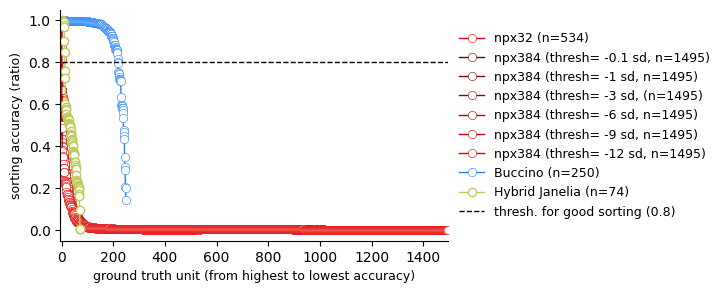

In [3]:
MARKERSIZE = 6

# get max unit count across dataset
n_units = max(
    [
        len(npx32_accuracies),
        len(npx384_accuracies_thresh_01),
        len(npx384_accuracies_thresh_02),
        len(npx384_accuracies_thresh_03),
        len(npx384_accuracies_thresh_04),
        len(npx384_accuracies_thresh_05),
        len(bucci_accuracies),
    ]
)

# plot accuracy (agreement score)
fig, axis = plt.subplots(1, 1, figsize=(5, 3))

# plot
axis.plot(
    npx32_acc_array,
    "r",
    label=f"npx32 (n={len(npx32_accuracies)})",
    linestyle="-",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=[1, 0, 0],
    color=[0.9, 0, 0],
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
axis.plot(
    npx384_acc_array_thresh_00,
    label=f"npx384 (thresh= -0.1 sd, n={len(npx384_accuracies_thresh_00)})",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=[0.5, 0, 0],
    color=[0.4, 0, 0],
    linestyle="-",
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
axis.plot(
    npx384_acc_array_thresh_01,
    label=f"npx384 (thresh= -1 sd, n={len(npx384_accuracies_thresh_01)})",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=[0.5, 0, 0],
    color=[0.5, 0, 0],
    linestyle="-",
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
axis.plot(
    npx384_acc_array_thresh_02,
    label=f"npx384 (thresh= -3 sd, (n={len(npx384_accuracies_thresh_02)})",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=[0.6, 0, 0],
    color=[0.6, 0, 0],
    linestyle="-",
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
axis.plot(
    npx384_acc_array_thresh_03,
    label=f"npx384 (thresh= -6 sd, n={len(npx384_accuracies_thresh_03)})",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=[0.7, 0, 0],
    color=[0.7, 0, 0],
    linestyle="-",
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
axis.plot(
    npx384_acc_array_thresh_04,
    label=f"npx384 (thresh= -9 sd, n={len(npx384_accuracies_thresh_04)})",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=[0.8, 0, 0],
    color=[0.8, 0, 0],
    linestyle="-",
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
axis.plot(
    npx384_acc_array_thresh_05,
    label=f"npx384 (thresh= -12 sd, n={len(npx384_accuracies_thresh_05)})",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=[0.9, 0, 0],
    color=[0.9, 0, 0],
    linestyle="-",
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
axis.plot(
    bucci_acc_array,
    label=f"Buccino (n={len(bucci_acc_array)})",
    linestyle="-",
    marker="o",
    markerfacecolor="w",
    color=(0.13, 0.50, 1),
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
axis.plot(
    janel_acc_array,
    label=f"Hybrid Janelia (n={len(janel_acc_array)})",
    color=(0.75, 0.8, 0.34),
    markerfacecolor="w",
    linestyle="-",
    marker="o",
    markersize=MARKERSIZE,
    linewidth=1,
)


# add legend
axis.spines[["right", "top"]].set_visible(False)
axis.set_ylabel("sorting accuracy (ratio)", fontsize=9)
axis.set_xlabel("ground truth unit (from highest to lowest accuracy)", fontsize=9)
axis.set_xlim([-5, n_units])
axis.hlines(
    y=0.8,
    xmin=0,
    xmax=n_units,
    linestyle="--",
    color="k",
    linewidth=1,
    label="thresh. for good sorting (0.8)",
)
axis.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

# save figures
plt.savefig("figures/3_bias/pdf/unit_accuracies_vs_thresh.pdf")
plt.savefig("figures/3_bias/svg/unit_accuracies_vs_thresh.svg")

### Detected units

In [4]:
DET_THRESH = 0.8
print(
    "Well detected units (npx382):",
    npx32_accuracies[npx32_accuracies >= DET_THRESH].index.tolist(),
)

Well detected units (npx382): [3891529, 2113524, 1808832, 2121825]


In [5]:
DET_THRESH = 0.8
print(
    "Well detected units (npx384):",
    npx384_accuracies_thresh_00[
        npx384_accuracies_thresh_00 >= DET_THRESH
    ].index.tolist(),
)

Well detected units (npx384): []
